# Prediction Using Unsupervised ML
#### This Notebook demonstrates the implementation of **K-Means Clustering**.

In this task we will use **IRIS**-DATASET to predict the optimum number of clusters and further represent it visually. 

### Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading and understanding **iris** data

In [3]:
data = pd.read_csv(r"C:\Users\Shahjeb Hasan\Downloads\Iris.csv")
data.head(50)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


There are no null or missing values and we have 6 columns ranging from 0-5 and 150 entries, 0 t0 149.

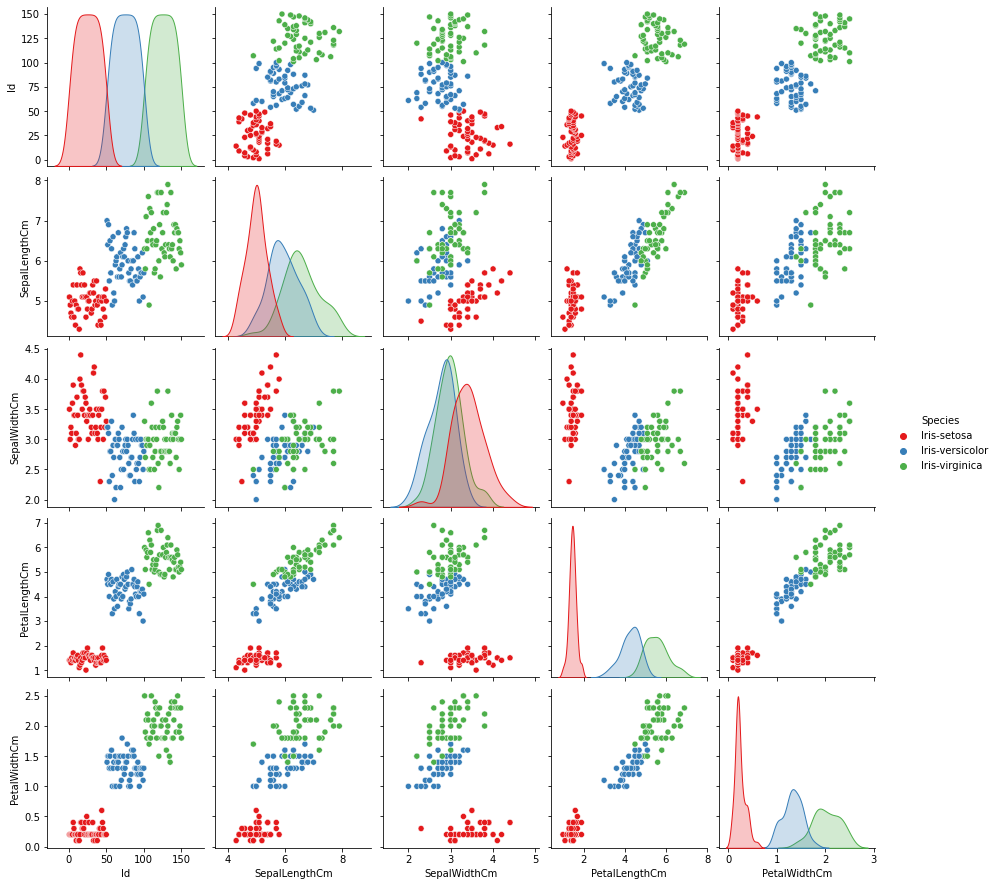

In [6]:
sns.pairplot(data=data,hue="Species",palette="Set1")
plt.show()

In [7]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

As we can see there 3 different species so there should be ideally 3 clusters for this dataset.

In [37]:
X=data.iloc[:,[0,1,2,3,4]]
y=data["Species"]
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


### Feature Scaling
It is a preprocessing technique to standardize the independent features present in the data in a fixed range.

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X=scaler.fit_transform(X)
print(scaled_X)



[[-1.72054204e+00 -9.00681170e-01  1.03205722e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.69744751e+00 -1.14301691e+00 -1.24957601e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.67435299e+00 -1.38535265e+00  3.37848329e-01 -1.39813811e+00
  -1.31297673e+00]
 [-1.65125846e+00 -1.50652052e+00  1.06445364e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.62816394e+00 -1.02184904e+00  1.26346019e+00 -1.34127240e+00
  -1.31297673e+00]
 [-1.60506942e+00 -5.37177559e-01  1.95766909e+00 -1.17067529e+00
  -1.05003079e+00]
 [-1.58197489e+00 -1.50652052e+00  8.00654259e-01 -1.34127240e+00
  -1.18150376e+00]
 [-1.55888037e+00 -1.02184904e+00  8.00654259e-01 -1.28440670e+00
  -1.31297673e+00]
 [-1.53578584e+00 -1.74885626e+00 -3.56360566e-01 -1.34127240e+00
  -1.31297673e+00]
 [-1.51269132e+00 -1.14301691e+00  1.06445364e-01 -1.28440670e+00
  -1.44444970e+00]
 [-1.48959680e+00 -5.37177559e-01  1.49486315e+00 -1.28440670e+00
  -1.31297673e+00]
 [-1.46650227e+00 -1.26418478e+00  8.00654259e-01 -1.22754100e+00

### Elbow Method
 We use **Elbow Method** to find the optimal number of K,clusters.  It involves running the algorithm multiple times over a loop(i.e; 9 times in this case), with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.
 

[749.9999999999998, 273.7275610947794, 177.05608895062977, 148.50795780759043, 123.08703011909043, 100.67395199557937, 90.54109297619968, 81.28959631329775, 73.28089076870576]
KMeans(n_clusters=9)


<function matplotlib.pyplot.show(close=None, block=None)>

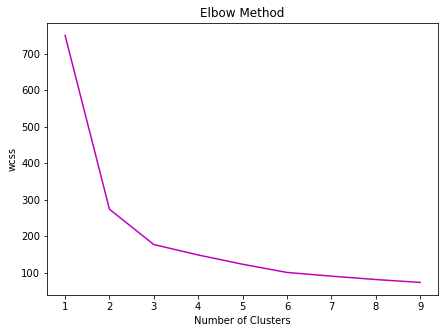

In [60]:
wcss = []
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(scaled_X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize = (7,5))
plt.plot(range(1,10),wcss,'m')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.title("Elbow Method")
plt.show

From the above plotting we can see that curve is decreasing very slowly after 3 so our elbow point is 3.

In [53]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(scaled_X)
prediction=kmeans.fit_predict(scaled_X)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### Data Visualization
we will visualize the clusters on the first two columns

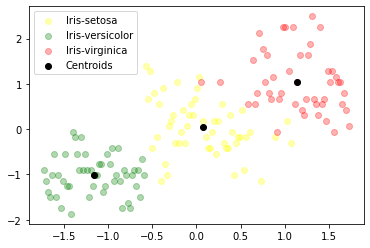

In [57]:
plt.scatter(scaled_X[prediction==0,0], scaled_X[prediction==0,1],c="yellow",alpha=0.3,label="Iris-setosa")
plt.scatter(scaled_X[prediction==1,0], scaled_X[prediction==1,1],c="green",alpha=0.3,label="Iris-versicolor")
plt.scatter(scaled_X[prediction==2,0], scaled_X[prediction==2,1],c="red",alpha=0.3,label="Iris-virginica")

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', label = 'Centroids')
plt.legend()

So, The above plotting is demonstration of **Kmeans Clustering** on IRIS-DATASET with 3 clusters, which is the optimum number of clusters.